In [29]:
using Plots
using Distributions
using SpecialFunctions
using Random
using DataFrames


In [30]:
# Détermination des paramètres de la loi de Weibull

lambda = 1.5
k = 2.0
mu = lambda * gamma(1 + 1/k)

println("La moyenne théorique de la distribution de Weibull est : ", mu)

La moyenne théorique de la distribution de Weibull est : 1.329340388179137


In [31]:
# Fonction qui calcule la médiane des moyennes

function median_of_means_opt(X)
    alpha=0.025
    n = length(X)
    k = abs(trunc(Int, 8 * log(1 / alpha)))
    m = div(n, k)
    means = [mean(X[((i-1)*m+1):min(i*m, n)]) for i in 1:k]
    return median(means)
end

median_of_means_opt (generic function with 1 method)

In [32]:
# Fonction qui calcule la médiane des moyennes pour différentes valeurs de c avec k=c*log(1/alpha)

function median_of_means_opt_C(X)
    
    alpha=0.025
    medians = []
    for c in 1:40
        n = length(X)
        k = abs(trunc(Int, c * log(1 / alpha)))
        m = div(n, k)
        means = [mean(X[((i-1)*m+1):min(i*m, n)]) for i in 1:k]
        push!(medians, median(means))
    end
    return medians
end

median_of_means_opt_C (generic function with 1 method)

In [33]:
#Fonction qui calcule la médiane des moyennes pour différentes valeurs de alpha

function median_of_meanAlpha(X)
    medians = Float64[]  
    alphas = 0.001:0.001:0.1  
    tolerance = 1e-10  
    for alpha in alphas
        n = length(X)
        if alpha > tolerance
            k = abs(trunc(Int, 8 * log(1 / alpha)))
            m = div(n, k)
            means = [mean(X[((i-1)*m+1):min(i*m, n)]) for i in 1:k]
            push!(medians, median(means))
        else
            push!(medians, NaN)
        end
    end
    return  alphas,medians  # Retourner également le vecteur d'alphas
end

median_of_meanAlpha (generic function with 1 method)

In [54]:
# Creation des données qui être utilisées pour les tests

# Loi exponentielle
# Moyenne théorique = 0.1
data1 = rand(Exponential(0.1), 10000)

#Loi de Pareto
#Moyenne théorique =3
data2 = rand(Pareto(1.2, 1.0),10000)

# Loi de Weibull

data3 = rand(Weibull(1.5, 2.0),10000)

10000-element Vector{Float64}:
 1.128863832161464
 0.13337129746108947
 0.7743568900606135
 1.8326540661499628
 1.2335123736034792
 1.720903777258559
 1.1286846169768627
 2.0500769411105804
 0.6013620028895283
 1.0138474370535049
 ⋮
 2.146453914795667
 2.913653623777429
 1.295825883875831
 2.0845173990209496
 1.9224665995969548
 2.581422553050267
 1.8752787181474344
 3.6078907268279203
 1.117733180365331

In [48]:
# Test de la médiane des moyennes pour la loi exponentielle

median_of_means_opt(data1)
println("La médiane des moyennes pour la loi exponentielle est : ", median_of_means_opt(data1))

# Test de la médiane des moyennes en fonction de c pour la loi exponentielle

median_of_means_opt_C(data1)
println("La médiane des moyennes pour la loi exponentielle en fonction de c est : ", median_of_means_opt_C(data1))

# Test de la médiane des moyennes en fonction de alpha pour la loi exponentielle

median_of_meanAlpha(data1)
println("La médiane des moyennes pour la loi exponentielle en fonction de alpha est : ", median_of_meanAlpha(data1))

La médiane des moyennes pour la loi exponentielle est : 0.0983933836485255
La médiane des moyennes pour la loi exponentielle en fonction de c est : Any[0.10048439107957499, 0.09991423625107175, 0.09918095185886312, 0.09934411362292525, 0.1000526330396119, 0.10093638659639695, 0.09894229191054892, 0.0983933836485255, 0.10051218622856184, 0.09897273980323311, 0.09890523784249722, 0.09913331937081732, 0.09904187049106758, 0.09974950917284281, 0.0994806390462376, 0.09887392798805852, 0.09966341758411765, 0.09800126669034018, 0.09826369259320358, 0.09851300402257149, 0.09894396985978351, 0.09922981329719736, 0.09878643919800845, 0.09914057873025309, 0.10091806473298898, 0.09816167788887079, 0.09858381426250383, 0.09853982800225301, 0.09838135887492079, 0.09983360723067236, 0.09874910270326609, 0.09802615236411501, 0.10000027235771879, 0.09892386184877834, 0.09853643886707614, 0.09948789538708941, 0.0997374926645748, 0.09896208795215566, 0.0984169698907175, 0.09876442286088244]
La médiane de

In [50]:
# Test de la médiane des moyennes pour la loi de Pareto

median_of_means_opt(data2)
println("La médiane des moyennes pour la loi de Pareto est : ", median_of_means_opt(data2))

# Test de la médiane des moyennes en fonction de c pour la loi de Pareto
median_of_means_opt_C(data2)
println("La médiane des moyennes pour la loi de Pareto en fonction de c est : ", median_of_means_opt_C(data2))

# Test de la médiane des moyennes en fonction de alpha pour la loi de Pareto
median_of_meanAlpha(data2)
println("La médiane des moyennes pour la loi de Pareto en fonction de alpha est : ", median_of_meanAlpha(data2))



La médiane des moyennes pour la loi de Pareto est : 1.080996486849638e28
La médiane des moyennes pour la loi de Pareto en fonction de c est : Any[2.1421139830695124e35, 2.2758681386738924e32, 1.2209798757133409e32, 1.58018491982479e29, 1.624934057035617e29, 3.154196007532041e28, 3.3539436561746647e28, 1.080996486849638e28, 1.4751905405027708e26, 1.4939912059659256e26, 1.108096159064674e26, 6.809746250790856e24, 3.691279697491745e24, 2.9805412352105345e24, 2.4291442728928955e24, 2.4373671057213347e23, 1.8946631346510267e23, 9.977921738631817e21, 2.3051976439810317e21, 4.020456170435485e21, 4.535010372519081e21, 3.116348757221277e21, 4.685987251758541e20, 1.5196717173950585e20, 9.499788474218119e19, 1.1962739609001332e20, 1.2436511475164239e20, 6.219214391490914e19, 4.943968580699048e19, 5.072576245973773e19, 4.262341992556393e19, 3.8854793038543815e19, 7.102438446615839e19, 4.231123884690724e19, 3.699988132729179e19, 1.2150839866368618e19, 7.844405961828152e18, 7.036724748197648e18, 3.4

In [46]:
# Test de la médiane des moyennes pour la loi de Weibull

median_of_means_opt(data3)
println("La médiane des moyennes pour la loi de Weibull est : ", median_of_means_opt(data3))

# Test de la médiane des moyennes en fonction de c pour la loi de Weibull   
median_of_means_opt_C(data3)
println("La médiane des moyennes pour la loi de Weibull en fonction de c est : ", median_of_means_opt_C(data3))

# Test de la médiane des moyennes en fonction de alpha pour la loi de Weibull
median_of_meanAlpha(data3)
println("La médiane des moyennes pour la loi de Weibull en fonction de alpha est : ", median_of_meanAlpha(data3))

La médiane des moyennes pour la loi de Weibull est : 1.812215212672907
La médiane des moyennes pour la loi de Weibull en fonction de c est : Any[1.8052509040108948, 1.8260782792708068, 1.8089431690820112, 1.8055835840674435, 1.8115193073014955, 1.8115056771829083, 1.8024773498553424, 1.812215212672907, 1.8104140426973538, 1.8035977898875957, 1.807410687782578, 1.8084877817091685, 1.8078432187180704, 1.8054003214854302, 1.8174248831158084, 1.8122046481025518, 1.8062212657648753, 1.800442887732939, 1.803990504889945, 1.80069441321579, 1.8122463775087598, 1.7928278115990188, 1.8072226473784574, 1.81562281811662, 1.7906960085405537, 1.8044051084355042, 1.8009965799142686, 1.8116173378757923, 1.8057901855205931, 1.8061091909909348, 1.8016995620493592, 1.8017337410016183, 1.8004584028013588, 1.8059681744636813, 1.8118958713869706, 1.8155867287323422, 1.8129361157231032, 1.8082610220751762, 1.7987844263673336, 1.8142187191570436]
La médiane des moyennes pour la loi de Weibull en fonction de a

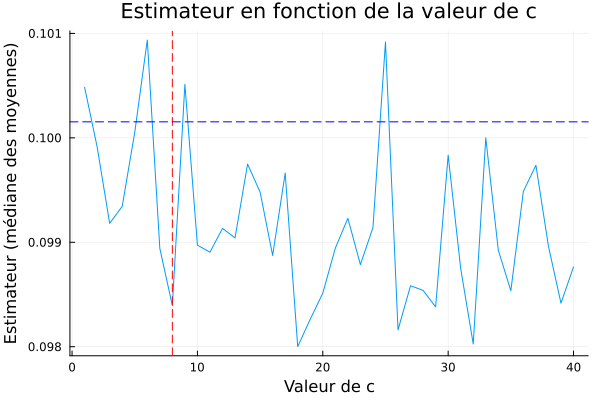

In [38]:
# Plot d'une loi exponentielle de paramètre 0.1

# Tracer le graphique
plot(1:40, median_of_means_opt_C(data1), xlabel="Valeur de c", ylabel="Estimateur (médiane des moyennes)", 
title="Estimateur en fonction de la valeur de c", legend=false)

# Ajout de la droite verticale à x = 8
vline!([8], color=:red, linestyle=:dash, label="x = 8")

# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data1)], color=:blue, linestyle=:dash, label="y = mean(data1)")


On remarque qu'avec notre estimateur MOM ayant comme valeur c=8, l'estimation de la moyenne est de 0.0985, ce qui est différent de la moyenne empirique mais reste tout de même assez proche, on peut donc dire que notre estimateur est bon. On peut constater que pour c=33 est meilleur que c=8, car l'estimation de la moyenne est plus proche de la moyenne empirique. 

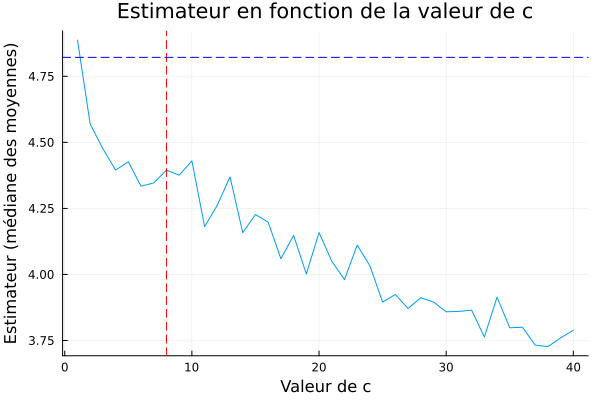

In [56]:
#Plot d'une loi de Pareto de paramètres 1.2 et 1
# Tracer le graphique
plot(1:40, median_of_means_opt_C(data2), xlabel="Valeur de c", ylabel="Estimateur (médiane des moyennes)", 
    title="Estimateur en fonction de la valeur de c", legend=false)

# Ajout de la droite verticale à x = 8
vline!([8], color=:red, linestyle=:dash, label="x = 8")

# Ajout de la droite horizontale à y = mean(data2)
hline!([mean(data2)], color=:blue, linestyle=:dash, label="y = mean(data2)")

On remarque que la valeur de l'estimateur décroit lorsque c augmente, et que la valeur du c qui permet de s'approcher le plus de la moyenne empirique est c=2.

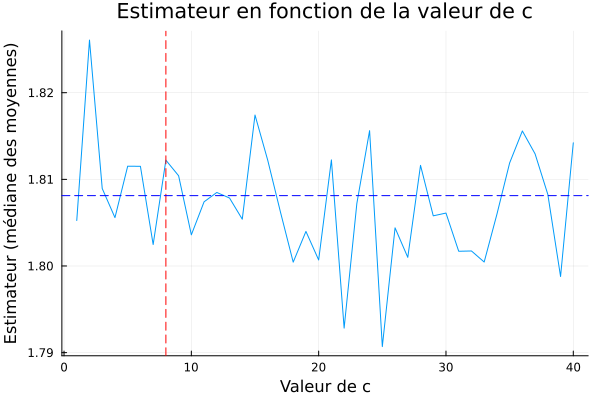

In [40]:
# Plot d'une loi de Weibull

# Tracer le graphique
plot(1:40, median_of_means_opt_C(data3), xlabel="Valeur de c", ylabel="Estimateur (médiane des moyennes)", 
    title="Estimateur en fonction de la valeur de c", legend=false)

# Ajout de la droite verticale à x = 8  
vline!([8], color=:red, linestyle=:dash, label="x = 8")

# Ajout de la droite horizontale à y = mean(data3)
hline!([mean(data3)],color=:blue, linestyle=:dash, label="y = mean(data3)")

Dans ce cas, l'estimateur fluctue autour de la moyenne empirique, mais que prendre c=12 semble être le meilleur choix pour notre estimateur. 

La valeur c=8 semble être un bon partie pris pour notre estimateur, même si il y'a des constantes encore plus optimales.

In [41]:
#Fonction qui compare la médiane des moyennes (avec le sample) et la moyenne empirique pour différentes tailles d'échantillons

function simulate_means_and_mom(k, m_range, dist)
    ns = k .* m_range
    x_bar = Float64[] 
    mom = Float64[] 

    for n in ns
        x = rand(dist, n)
        push!(x_bar, mean(x))
        push!(mom, median_of_means_opt(x))
    end
    plot(ns, mom, label="Median of Means")
    plot!(ns, x_bar, label="Empirical Mean", title="Empirical Mean vs Median of Means", xlabel="Sample Size", ylabel="Mean")
    
end

simulate_means_and_mom (generic function with 1 method)

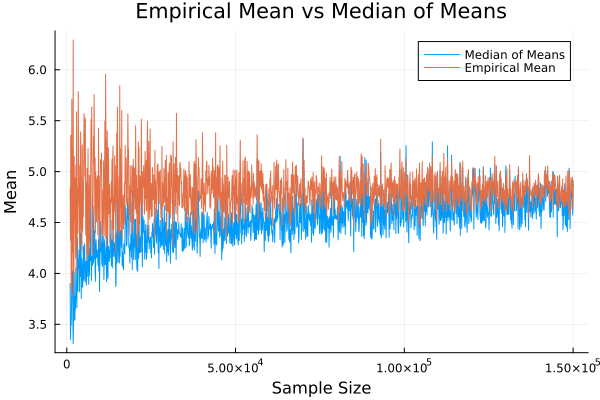

In [57]:
simulate_means_and_mom(100, 10:1500, data2)

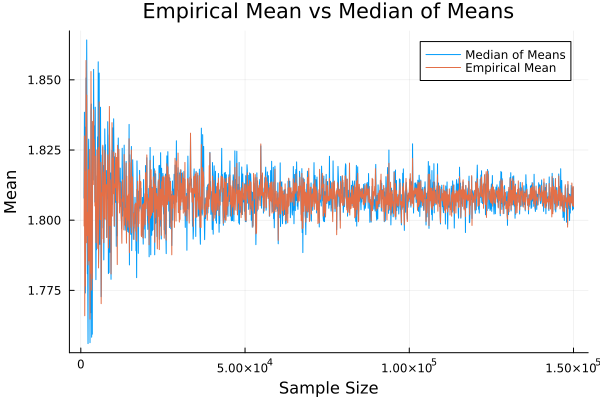

In [43]:
simulate_means_and_mom(100, 10:1500, data3)

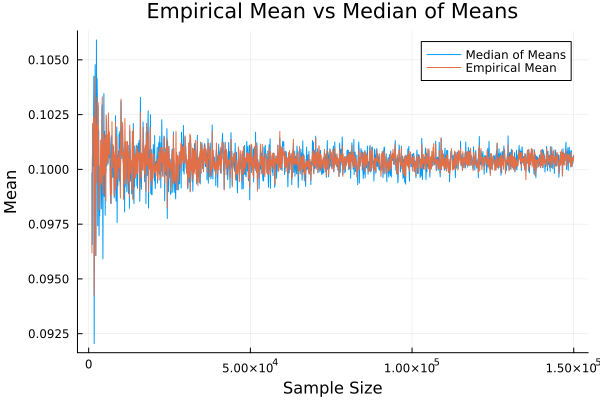

In [58]:
simulate_means_and_mom(100, 10:1500, data1)

Les estimateurs sont assez similaire, et dans les deux cas les estimateurs tendent vers la vrai moyenne. On remarque que plus l'echantillon est grand et plus l'estimateur MOM est proche de la vrai moyenne, et plus la taille de l'intervalle de confiance est petite.

Mais pour la Pareto (data2), l'estimateur MOM sous-estime la moyenne, et l'estimateur MLE est plus proche de la vrai moyenne. (Bizarre)

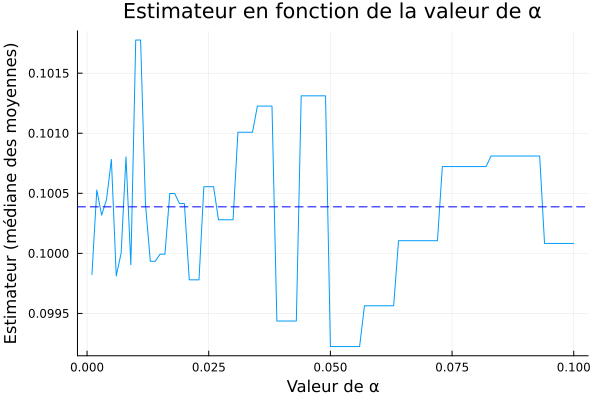

In [64]:
#Plot sur une Loi exponentielle de paramètre 0.1

#Mean=0.1

plot(median_of_meanAlpha(data1), xlabel="Valeur de α", ylabel="Estimateur (médiane des moyennes)", 
        title="Estimateur en fonction de la valeur de α", legend=false)

# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data1)], color=:blue, linestyle=:dash, label="y = mean(data1)")



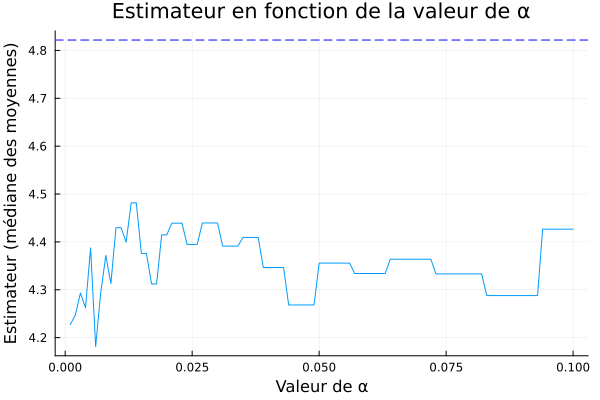

In [62]:
#Plot sur une Loi de Pareto
plot(median_of_meanAlpha(data2), xlabel="Valeur de α", ylabel="Estimateur (médiane des moyennes)", 
        title="Estimateur en fonction de la valeur de α", legend=false)
# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data2)], color=:blue, linestyle=:dash, label="y = mean(data1)")

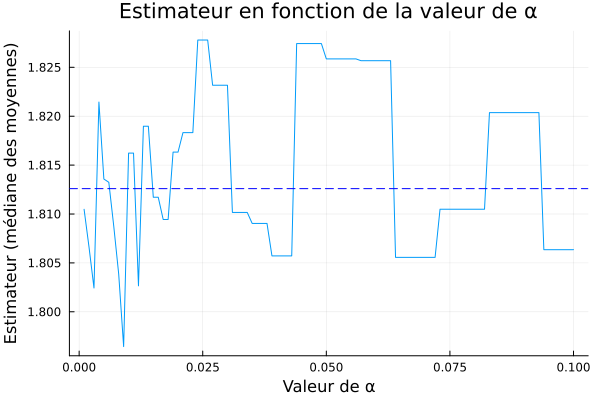

In [65]:
#Plot sur une Loi de Weibull
plot(median_of_meanAlpha(data3), xlabel="Valeur de α", ylabel="Estimateur (médiane des moyennes)", 
        title="Estimateur en fonction de la valeur de α", legend=false)
# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data3)], color=:blue, linestyle=:dash, label="y = mean(data1)")